In [12]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from scipy import ndimage
from six.moves import cPickle as pickle
import tensorflow as tf

In [15]:
train_filename = 'trainSimple26class'
test_filename = 'testSimple26class'

In [17]:
# extracting the datasets
num_classes = 26
np.random.seed(133)

def maybe_extract(filename, force=False):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s already present - Skipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall()
    tar.close()
  data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root))
    if os.path.isdir(os.path.join(root, d))]
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print(data_folders)
  return data_folders
  
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

trainSimple26class already present - Skipping extraction of trainSimple26class.
['trainSimple26class/0', 'trainSimple26class/10', 'trainSimple26class/100', 'trainSimple26class/110', 'trainSimple26class/120', 'trainSimple26class/130', 'trainSimple26class/140', 'trainSimple26class/150', 'trainSimple26class/160', 'trainSimple26class/170', 'trainSimple26class/180', 'trainSimple26class/190', 'trainSimple26class/20', 'trainSimple26class/200', 'trainSimple26class/210', 'trainSimple26class/220', 'trainSimple26class/230', 'trainSimple26class/240', 'trainSimple26class/250', 'trainSimple26class/30', 'trainSimple26class/40', 'trainSimple26class/50', 'trainSimple26class/60', 'trainSimple26class/70', 'trainSimple26class/80', 'trainSimple26class/90']
testSimple26class already present - Skipping extraction of testSimple26class.
['testSimple26class/0', 'testSimple26class/10', 'testSimple26class/100', 'testSimple26class/110', 'testSimple26class/120', 'testSimple26class/130', 'testSimple26class/140', 'te

In [18]:
# have a look at data
import random
import hashlib

def disp_samples(data_folders, sample_size):
  for folder in data_folders:
    print(folder)
    image_files = os.listdir(folder)
    image_sample = random.sample(image_files, sample_size)
    for image in image_sample:
      image_file = os.path.join(folder, image)
      i = Image(filename=image_file)
      display(i)

In [7]:
disp_samples(train_folders, 1)

train256classSimple10000/0


train256classSimple10000/1


train256classSimple10000/10


train256classSimple10000/100


train256classSimple10000/101


train256classSimple10000/102


train256classSimple10000/103


train256classSimple10000/104


train256classSimple10000/105


train256classSimple10000/106


train256classSimple10000/107


train256classSimple10000/108


train256classSimple10000/109


train256classSimple10000/11


train256classSimple10000/110


train256classSimple10000/111


train256classSimple10000/112


train256classSimple10000/113


train256classSimple10000/114


train256classSimple10000/115


train256classSimple10000/116


train256classSimple10000/117


train256classSimple10000/118


train256classSimple10000/119


train256classSimple10000/12


train256classSimple10000/120


train256classSimple10000/121


train256classSimple10000/122


train256classSimple10000/123


train256classSimple10000/124


train256classSimple10000/125


train256classSimple10000/126


train256classSimple10000/127


train256classSimple10000/128


train256classSimple10000/129


train256classSimple10000/13


train256classSimple10000/130


train256classSimple10000/131


train256classSimple10000/132


train256classSimple10000/133


train256classSimple10000/134


train256classSimple10000/135


train256classSimple10000/136


train256classSimple10000/137


train256classSimple10000/138


train256classSimple10000/139


train256classSimple10000/14


train256classSimple10000/140


train256classSimple10000/141


train256classSimple10000/142


train256classSimple10000/143


train256classSimple10000/144


train256classSimple10000/145


train256classSimple10000/146


train256classSimple10000/147


train256classSimple10000/148


train256classSimple10000/149


train256classSimple10000/15


train256classSimple10000/150


train256classSimple10000/151


train256classSimple10000/152


train256classSimple10000/153


train256classSimple10000/154


train256classSimple10000/155


train256classSimple10000/156


train256classSimple10000/157


train256classSimple10000/158


train256classSimple10000/159


train256classSimple10000/16


train256classSimple10000/160


train256classSimple10000/161


train256classSimple10000/162


train256classSimple10000/163


train256classSimple10000/164


train256classSimple10000/165


train256classSimple10000/166


train256classSimple10000/167


train256classSimple10000/168


train256classSimple10000/169


train256classSimple10000/17


train256classSimple10000/170


train256classSimple10000/171


train256classSimple10000/172


train256classSimple10000/173


train256classSimple10000/174


train256classSimple10000/175


train256classSimple10000/176


train256classSimple10000/177


train256classSimple10000/178


train256classSimple10000/179


train256classSimple10000/18


train256classSimple10000/180


train256classSimple10000/181


train256classSimple10000/182


train256classSimple10000/183


train256classSimple10000/184


train256classSimple10000/185


train256classSimple10000/186


train256classSimple10000/187


train256classSimple10000/188


train256classSimple10000/189


train256classSimple10000/19


train256classSimple10000/190


train256classSimple10000/191


train256classSimple10000/192


train256classSimple10000/193


train256classSimple10000/194


train256classSimple10000/195


train256classSimple10000/196


train256classSimple10000/197


train256classSimple10000/198


train256classSimple10000/199


train256classSimple10000/2


train256classSimple10000/20


train256classSimple10000/200


train256classSimple10000/201


train256classSimple10000/202


train256classSimple10000/203


train256classSimple10000/204


train256classSimple10000/205


train256classSimple10000/206


train256classSimple10000/207


train256classSimple10000/208


train256classSimple10000/209


train256classSimple10000/21


train256classSimple10000/210


train256classSimple10000/211


train256classSimple10000/212


train256classSimple10000/213


train256classSimple10000/214


train256classSimple10000/215


train256classSimple10000/216


train256classSimple10000/217


train256classSimple10000/218


train256classSimple10000/219


train256classSimple10000/22


train256classSimple10000/220


train256classSimple10000/221


train256classSimple10000/222


train256classSimple10000/223


train256classSimple10000/224


train256classSimple10000/225


train256classSimple10000/226


train256classSimple10000/227


train256classSimple10000/228


train256classSimple10000/229


train256classSimple10000/23


train256classSimple10000/230


train256classSimple10000/231


train256classSimple10000/232


train256classSimple10000/233


train256classSimple10000/234


train256classSimple10000/235


train256classSimple10000/236


train256classSimple10000/237


train256classSimple10000/238


train256classSimple10000/239


train256classSimple10000/24


train256classSimple10000/240


train256classSimple10000/241


train256classSimple10000/242


train256classSimple10000/243


train256classSimple10000/244


train256classSimple10000/245


train256classSimple10000/246


train256classSimple10000/247


train256classSimple10000/248


train256classSimple10000/249


train256classSimple10000/25


train256classSimple10000/250


train256classSimple10000/251


train256classSimple10000/252


train256classSimple10000/253


train256classSimple10000/254


train256classSimple10000/255


train256classSimple10000/26


train256classSimple10000/27


train256classSimple10000/28


train256classSimple10000/29


train256classSimple10000/3


train256classSimple10000/30


train256classSimple10000/31


train256classSimple10000/32


train256classSimple10000/33


train256classSimple10000/34


train256classSimple10000/35


train256classSimple10000/36


train256classSimple10000/37


train256classSimple10000/38


train256classSimple10000/39


train256classSimple10000/4


train256classSimple10000/40


train256classSimple10000/41


train256classSimple10000/42


train256classSimple10000/43


train256classSimple10000/44


train256classSimple10000/45


train256classSimple10000/46


train256classSimple10000/47


train256classSimple10000/48


train256classSimple10000/49


train256classSimple10000/5


train256classSimple10000/50


train256classSimple10000/51


train256classSimple10000/52


train256classSimple10000/53


train256classSimple10000/54


train256classSimple10000/55


train256classSimple10000/56


train256classSimple10000/57


train256classSimple10000/58


train256classSimple10000/59


train256classSimple10000/6


train256classSimple10000/60


train256classSimple10000/61


train256classSimple10000/62


train256classSimple10000/63


train256classSimple10000/64


train256classSimple10000/65


train256classSimple10000/66


train256classSimple10000/67


train256classSimple10000/68


train256classSimple10000/69


train256classSimple10000/7


train256classSimple10000/70


train256classSimple10000/71


train256classSimple10000/72


train256classSimple10000/73


train256classSimple10000/74


train256classSimple10000/75


train256classSimple10000/76


train256classSimple10000/77


train256classSimple10000/78


train256classSimple10000/79


train256classSimple10000/8


train256classSimple10000/80


train256classSimple10000/81


train256classSimple10000/82


train256classSimple10000/83


train256classSimple10000/84


train256classSimple10000/85


train256classSimple10000/86


train256classSimple10000/87


train256classSimple10000/88


train256classSimple10000/89


train256classSimple10000/9


train256classSimple10000/90


train256classSimple10000/91


train256classSimple10000/92


train256classSimple10000/93


train256classSimple10000/94


train256classSimple10000/95


train256classSimple10000/96


train256classSimple10000/97


train256classSimple10000/98


train256classSimple10000/99


In [10]:
disp_samples(test_folders, 1)

test255class10000/0


test255class10000/1


test255class10000/10


test255class10000/100


test255class10000/101


test255class10000/102


test255class10000/103


test255class10000/104


test255class10000/105


test255class10000/106


test255class10000/107


test255class10000/108


test255class10000/109


test255class10000/11


test255class10000/110


test255class10000/111


test255class10000/112


test255class10000/113


test255class10000/114


test255class10000/115


test255class10000/116


test255class10000/117


test255class10000/118


test255class10000/119


test255class10000/12


test255class10000/120


test255class10000/121


test255class10000/122


test255class10000/123


test255class10000/124


test255class10000/125


test255class10000/126


test255class10000/127


test255class10000/128


test255class10000/129


test255class10000/13


test255class10000/130


test255class10000/131


test255class10000/132


test255class10000/133


test255class10000/134


test255class10000/135


test255class10000/136


test255class10000/137


test255class10000/138


test255class10000/139


test255class10000/14


test255class10000/140


test255class10000/141


test255class10000/142


test255class10000/143


test255class10000/144


test255class10000/145


test255class10000/146


test255class10000/147


test255class10000/148


test255class10000/149


test255class10000/15


test255class10000/150


test255class10000/151


test255class10000/152


test255class10000/153


test255class10000/154


test255class10000/155


test255class10000/156


test255class10000/157


test255class10000/158


test255class10000/159


test255class10000/16


test255class10000/160


test255class10000/161


test255class10000/162


test255class10000/163


test255class10000/164


test255class10000/165


test255class10000/166


test255class10000/167


test255class10000/168


test255class10000/169


test255class10000/17


test255class10000/170


test255class10000/171


test255class10000/172


test255class10000/173


test255class10000/174


test255class10000/175


test255class10000/176


test255class10000/177


test255class10000/178


test255class10000/179


test255class10000/18


test255class10000/180


test255class10000/181


test255class10000/182


test255class10000/183


test255class10000/184


test255class10000/185


test255class10000/186


test255class10000/187


test255class10000/188


test255class10000/189


test255class10000/19


test255class10000/190


test255class10000/191


test255class10000/192


test255class10000/193


test255class10000/194


test255class10000/195


test255class10000/196


test255class10000/197


test255class10000/198


test255class10000/199


test255class10000/2


test255class10000/20


test255class10000/200


test255class10000/201


test255class10000/202


test255class10000/203


test255class10000/204


test255class10000/205


test255class10000/206


test255class10000/207


test255class10000/208


test255class10000/209


test255class10000/21


test255class10000/210


test255class10000/211


test255class10000/212


test255class10000/213


test255class10000/214


test255class10000/215


test255class10000/216


test255class10000/217


test255class10000/218


test255class10000/219


test255class10000/22


test255class10000/220


test255class10000/221


test255class10000/222


test255class10000/223


test255class10000/224


test255class10000/225


test255class10000/226


test255class10000/227


test255class10000/228


test255class10000/229


test255class10000/23


test255class10000/230


test255class10000/231


test255class10000/232


test255class10000/233


test255class10000/234


test255class10000/235


test255class10000/236


test255class10000/237


test255class10000/238


test255class10000/239


test255class10000/24


test255class10000/240


test255class10000/241


test255class10000/242


test255class10000/243


test255class10000/244


test255class10000/245


test255class10000/246


test255class10000/247


test255class10000/248


test255class10000/249


test255class10000/25


test255class10000/250


test255class10000/251


test255class10000/252


test255class10000/253


test255class10000/254


test255class10000/255


test255class10000/26


test255class10000/27


test255class10000/28


test255class10000/29


test255class10000/3


test255class10000/30


test255class10000/31


test255class10000/32


test255class10000/33


test255class10000/34


test255class10000/35


test255class10000/36


test255class10000/37


test255class10000/38


test255class10000/39


test255class10000/4


test255class10000/40


test255class10000/41


test255class10000/42


test255class10000/43


test255class10000/44


test255class10000/45


test255class10000/46


test255class10000/47


test255class10000/48


test255class10000/49


test255class10000/5


test255class10000/50


test255class10000/51


test255class10000/52


test255class10000/53


test255class10000/54


test255class10000/55


test255class10000/56


test255class10000/57


test255class10000/58


test255class10000/59


test255class10000/6


test255class10000/60


test255class10000/61


test255class10000/62


test255class10000/63


test255class10000/64


test255class10000/65


test255class10000/66


test255class10000/67


test255class10000/68


test255class10000/69


test255class10000/7


test255class10000/70


test255class10000/71


test255class10000/72


test255class10000/73


test255class10000/74


test255class10000/75


test255class10000/76


test255class10000/77


test255class10000/78


test255class10000/79


test255class10000/8


test255class10000/80


test255class10000/81


test255class10000/82


test255class10000/83


test255class10000/84


test255class10000/85


test255class10000/86


test255class10000/87


test255class10000/88


test255class10000/89


test255class10000/9


test255class10000/90


test255class10000/91


test255class10000/92


test255class10000/93


test255class10000/94


test255class10000/95


test255class10000/96


test255class10000/97


test255class10000/98


test255class10000/99


In [20]:
#Merging the data

image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.
num_of_classes = 26

float_formatter = lambda x: "%.2f" % x

        
def Merge_folders(data_folders, size_per_class):
  dataset_names = []
  start_t = 0
  end_t = size_per_class
  required_size = size_per_class * num_of_classes
  trainDataset = np.ndarray((required_size, image_size, image_size), dtype=np.float32)
  labelsDataset = np.ndarray((required_size, 1), dtype=np.float32)
  for folder in data_folders:
    dataset_names.append(folder)

    print('Merging %s.' % folder)
    image_files = os.listdir(folder)
    dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
    image_index = 0
    for image in os.listdir(folder):
        if image_index < size_per_class:
            image_file = os.path.join(folder, image)
            image_data = (ndimage.imread(image_file).astype(int))
            dataset[image_index, :, :] = image_data
            image_index += 1
    num_images = image_index
    dataset = dataset[0:num_images, :, :]
    trainDataset[start_t:end_t, :, :] = dataset
    x = float(folder.split("/")[1]) / 255.0
    #y = float_formatter(x)
    labelsDataset[start_t:end_t] = x
    start_t += size_per_class
    end_t += size_per_class

  
  return dataset_names, trainDataset, labelsDataset

train_datasets, trainDataset, labelsTrainDataset = Merge_folders(train_folders, 10000)
test_datasets, testDataset, labelsTestDataset = Merge_folders(test_folders, 100)

print(trainDataset)
print(labelsTrainDataset)

print(testDataset)
print(labelsTestDataset)

print('trainDataset.shape' , trainDataset.shape)
print('labelsTrainDataset.shape' , labelsTrainDataset.shape)

print('testDataset.shape' , testDataset.shape)
print('labelsTestDataset.shape' , labelsTestDataset.shape)

Merging trainSimple26class/0.
Merging trainSimple26class/10.
Merging trainSimple26class/100.
Merging trainSimple26class/110.
Merging trainSimple26class/120.
Merging trainSimple26class/130.
Merging trainSimple26class/140.
Merging trainSimple26class/150.
Merging trainSimple26class/160.
Merging trainSimple26class/170.
Merging trainSimple26class/180.
Merging trainSimple26class/190.
Merging trainSimple26class/20.
Merging trainSimple26class/200.
Merging trainSimple26class/210.
Merging trainSimple26class/220.
Merging trainSimple26class/230.
Merging trainSimple26class/240.
Merging trainSimple26class/250.
Merging trainSimple26class/30.
Merging trainSimple26class/40.
Merging trainSimple26class/50.
Merging trainSimple26class/60.
Merging trainSimple26class/70.
Merging trainSimple26class/80.
Merging trainSimple26class/90.
Merging testSimple26class/0.
Merging testSimple26class/10.
Merging testSimple26class/100.
Merging testSimple26class/110.
Merging testSimple26class/120.
Merging testSimple26class/1

35545
[ 0.43137255]


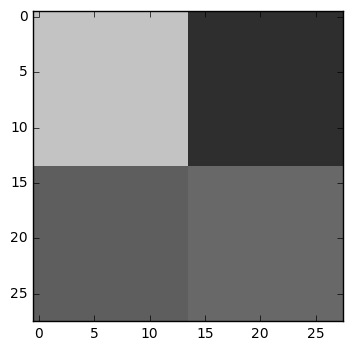

0.43137254901960786

In [28]:
#test the data
rand_image = random.randint(0, 260000)
print (rand_image)
plt.imshow(trainDataset[rand_image], cmap='gray', interpolation='nearest', vmin=0, vmax=255)
print (labelsTrainDataset[rand_image])
plt.show()
np.mean(trainDataset[rand_image])/ 255.0

In [13]:
# randomize the data
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(trainDataset, labelsTrainDataset)
test_dataset, test_labels = randomize(testDataset, labelsTestDataset)
print('Randomizing is done')

Randomizing is done


1810937
[ 0.5411765]


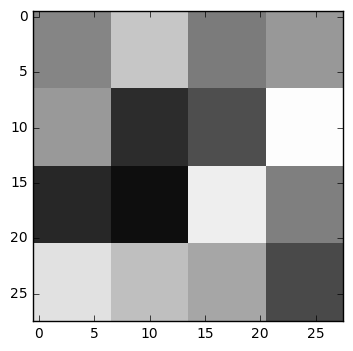

0.54117647058823526

In [14]:
#test the data
rand_image = random.randint(0, 2550000)
print (rand_image)
plt.imshow(train_dataset[rand_image], cmap='gray', interpolation='nearest', vmin=0, vmax=255)
print (train_labels[rand_image])
plt.show()
np.mean(train_dataset[rand_image]) / 255.0

11487
[ 0.63921571]


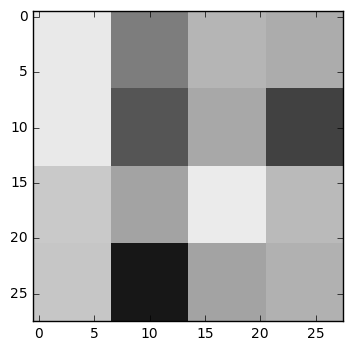

0.63921568627450975

In [15]:
#test the data
rand_image = random.randint(0, 25500)
print (rand_image)
plt.imshow(test_dataset[rand_image], cmap='gray', interpolation='nearest', vmin=0, vmax=255)
print (test_labels[rand_image])
plt.show()
np.mean(test_dataset[rand_image]) / 255.0

In [16]:
# save the data
pickle_file = 'br255class10000Reg.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
  print('saved')
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

Unable to save data to br255class10000Reg.pickle : error return without exception set


SystemError: error return without exception set

In [14]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

NameError: name 'pickle_file' is not defined

In [ ]:
#estimate the duplicates

all_data = pickle.load(open('train255class10000Reg.pickle', 'rb'))

def count_duplicates(dataset1, dataset2):
    hashes = [hashlib.sha1(x).hexdigest() for x in dataset1]
    dup_indices = []
    for i in range(0, len(dataset2)):
        if hashlib.sha1(dataset2[i]).hexdigest() in hashes:
            dup_indices.append(i)
    return len(dup_indices)


print(count_duplicates(all_data['test_dataset'], all_data['train_dataset']))

In [ ]:
# test a regression model

train_dataset = all_data['train_dataset']
train_labels = all_data['train_labels']
test_dataset = all_data['test_dataset']
test_labels = all_data['test_labels']

print (len(train_dataset))
print (len(train_labels))
print (len(test_dataset))
print (len(test_labels))

In [ ]:

def get_score(train_dataset, train_labels, test_dataset, test_labels):
    model = LinearRegression()
    train_flatten_dataset = np.array([x.flatten() for x in train_dataset])
    test_flatten_dataset = np.array([x.flatten() for x in test_dataset])
    model.fit(train_flatten_dataset, train_labels)

    return model.score([x.flatten() for x in test_dataset], test_labels)

print("100 trainsamples score: " + str(get_score(train_dataset[:100], train_labels[:100], test_dataset, test_labels)))
print("1000 trainsamples score: " + str(get_score(train_dataset[:1000], train_labels[:1000], test_dataset, test_labels)))
print("5000 trainsamples score: " + str(get_score(train_dataset[:5000], train_labels[:5000], test_dataset, test_labels)))
print("10000 trainsamples score: " + str(get_score(train_dataset[:10000], train_labels[:10000], test_dataset, test_labels)))
print("60000 trainsamples score: " + str(get_score(train_dataset[:60000], train_labels[:60000], test_dataset, test_labels)))

In [ ]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_flatten_dataset = np.array([x.flatten() for x in train_dataset])
test_flatten_dataset = np.array([x.flatten() for x in test_dataset])
regr.fit(train_flatten_dataset, train_labels)
print("Mean squared error: %.2f"
      % np.mean((regr.predict(test_flatten_dataset) - test_labels) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(test_flatten_dataset, test_labels))


In [ ]:
test_flatten_dataset

In [ ]:
test_labels

In [ ]:
xs = regr.predict(test_flatten_dataset)
regr.predict(test_flatten_dataset)

In [ ]:
test_labels.shape

In [ ]:
regr.predict(test_flatten_dataset).shape

In [ ]:
test_labels[10:20]

In [ ]:
xs[10:20]

In [ ]:
pickle_file = 'br6class14DReg.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  test_dataset = save['test_dataset']
  test_labels = save['test_labels']
  del save  # hint to help gc free up memory
  print('Training set', train_dataset.shape, train_labels.shape)
  print('Test set', test_dataset.shape, test_labels.shape)

In [ ]:
image_size = 28
num_labels = 6

def reformat(dataset, labels):
  dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
  # Map 0 to [1.0, 0.0, 0.0 ...], 1 to [0.0, 1.0, 0.0 ...]
  return dataset, labels
train_dataset, train_labels = reformat(train_dataset, train_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)
print('Training set', train_dataset.shape, train_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

In [ ]:
# With gradient descent training, even this much data is prohibitive.
# Subset the training data for faster turnaround.
train_subset = 100

graph = tf.Graph()
with graph.as_default():

  # Input data.
  # Load the training, validation and test data into constants that are
  # attached to the graph.
  tf_train_dataset = tf.constant(train_dataset[:train_subset, :])
  tf_train_labels = tf.constant(train_labels[:train_subset])
  tf_test_dataset = tf.constant(test_dataset)
  
  # Variables.
  # These are the parameters that we are going to be training. The weight
  # matrix will be initialized using random valued following a (truncated)
  # normal distribution. The biases get initialized to zero.
  weights = tf.Variable(
    tf.truncated_normal([image_size * image_size, 1]))
  biases = tf.Variable(tf.zeros([1]))
  
  # Training computation.
  # We multiply the inputs with the weight matrix, and add biases. We compute
  # the softmax and cross-entropy (it's one operation in TensorFlow, because
  # it's very common, and it can be optimized). We take the average of this
  # cross-entropy across all training examples: that's our loss.
  logits = tf.matmul(tf_train_dataset, weights) + biases
  loss = tf.reduce_mean(tf.square(logits - tf_train_labels))
  
  # Optimizer.
  # We are going to find the minimum of this loss using gradient descent.
  optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  # These are not part of training, but merely here so that we can report
  # accuracy figures as we train.
  train_prediction = logits
  test_prediction = tf.matmul(tf_test_dataset, weights) + biases

In [ ]:
def meanSqrError(predictions, values):
  return np.mean(((predictions - values) ** 2))

num_steps = 1001

with tf.Session(graph=graph) as session:
  tf.global_variables_initializer().run()
  print('Initialized')
  for step in range(num_steps):
    #feed_dict = {tf_train_dataset : tf_train_dataset, tf_train_labels : tf_train_labels}
    #_, l, predictions = session.run(
    #  [optimizer, loss, train_prediction], feed_dict=feed_dict)
    _, l, predictions = session.run([optimizer, loss, train_prediction])
    #tuning_cost = session.run(loss, feed_dict)
    #print ("Tuning cost=", "{:.9f}".format(tuning_cost))
    if (step % 50 == 0):
        print('Loss at step %d: %f' % (step, l))
      #print('Minibatch loss at step %d: %f' % (step, tuning_cost))
  #print('Test accuracy: %.1f%%' % meanSqrError(test_prediction.eval(), test_prediction))
  #testing_cost = session.run(loss, feed_dict={tf_test_dataset: tf_test_dataset, test_labels:test_labels})    
  #print ("Testing data cost:" , testing_cost)

In [12]:
# Reformat the data: image data as a cube (width by height by number 
# of channels) and labels as float 1-hot encodings.
image_size = 28
num_labels = 1
num_channels = 1 # grayscale

def reformat(dataset, labels):
  dataset = dataset.reshape(
    (-1, image_size, image_size, num_channels)).astype(np.float32)
  #labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
  return dataset, labels
train_dataset, train_labels = reformat(train_dataset, train_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)
print('Reformatted training set', train_dataset.shape, train_labels.shape)
print('Reformatted test set', test_dataset.shape, test_labels.shape)

Reformatted training set (2560000, 28, 28, 1) (2560000, 1)
Reformatted test set (25600, 28, 28, 1) (25600, 1)


In [60]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

def meanSqrError(predictions, values):
  return np.mean(((predictions - values) ** 2))

def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

def drop_out(x, keep_prob):
  return tf.nn.dropout(x, keep_prob)


batch_size = 100


graph = tf.Graph()

with graph.as_default():

  # Input data.
  tf_train_dataset = tf.placeholder(
    tf.float32, shape=(batch_size, image_size, image_size, num_channels))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_test_dataset = tf.constant(test_dataset)
  
  # Variables.
  W_conv1 = weight_variable([5, 5, 1, 32])
  b_conv1 = bias_variable([32])

  W_conv2 = weight_variable([5, 5, 32, 64])
  b_conv2 = bias_variable([64])

  W_conv3 = weight_variable([5, 5, 64, 128])
  b_conv3 = bias_variable([128])

  W_conv4 = weight_variable([5, 5, 128, 256])
  b_conv4 = bias_variable([256])

  W_fc1 = weight_variable([7 * 7 * 256, 1024])
  b_fc1 = bias_variable([1024])

  W_fc2 = weight_variable([1024, 2048])
  b_fc2 = bias_variable([2048])

  W_fc3 = weight_variable([2048, num_labels])
  b_fc3 = bias_variable([num_labels])

  
  # Model.
  def model(data):
    h_conv1 = tf.nn.relu(conv2d(data, W_conv1) + b_conv1)
    h_conv2 = tf.nn.relu(conv2d(h_conv1, W_conv2) + b_conv2)
    h_pool1 = max_pool_2x2(h_conv2)
    h_conv3 = tf.nn.relu(conv2d(h_pool1, W_conv3) + b_conv3)
    h_conv4 = tf.nn.relu(conv2d(h_conv3, W_conv4) + b_conv4) 
    h_pool2 = max_pool_2x2(h_conv4)
    shape = h_pool2.get_shape().as_list()
    reshape = tf.reshape(h_pool2, [shape[0], shape[1] * shape[2] * shape[3]])
    h_fc1 = tf.nn.relu(tf.matmul(reshape, W_fc1) + b_fc1)
    h_fc2 = tf.nn.tanh(tf.matmul(h_fc1, W_fc2) + b_fc2)
    #keep_prob = tf.placeholder(tf.float32)
    #h_fc2_drop = tf.nn.dropout(h_fc2, keep_prob)
    return tf.matmul(h_fc2, W_fc3) + b_fc3

# Training computation.
  logits = model(tf_train_dataset)
  #loss = tf.reduce_mean(
    #tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))
  loss = tf.reduce_mean(tf.square(logits - tf_train_labels))

    
  # Optimizer.
  optimizer = tf.train.AdamOptimizer(0.005).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  #train_prediction = tf.nn.softmax(logits)
  train_prediction = logits
  #test_prediction = tf.nn.softmax(model(tf_test_dataset))
  test_prediction = model(tf_test_dataset)

In [61]:
num_steps = 101
step_plot = []
loss_plot = []
accuracy_plot = []

with tf.Session(graph=graph) as session:
  tf.global_variables_initializer().run()

  print('Initialized')
  for step in range(num_steps):
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 50 == 0):
      print('Minibatch loss at step %d: %f' % (step, l))
      #acc = accuracy(predictions, batch_labels)
      #print('Minibatch accuracy: %.1f%%' % acc)
      step_plot.append(step)
      loss_plot.append(l)
      #accuracy_plot.append(acc)

  #print ("Testing data cost:" , l)

  print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels))
  #print('Test accuracy: %.1f%%' % meanSqrError(test_prediction.eval(), test_labels))
  plt.figure(facecolor='white')
  plt.plot(step_plot, loss_plot, 'rs--')
  plt.xlabel('Steps')
  plt.ylabel('Loss')
  plt.title('Loss plot')
  plt.grid(True)
  plt.show()

Initialized
Minibatch loss at step 0: 12.008623
Minibatch loss at step 50: 3.540475
Minibatch loss at step 100: 0.438394


ResourceExhaustedError: OOM when allocating tensor with shape[25600,32,28,28]
	 [[Node: Conv2D_4 = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/gpu:0"](Const, Variable/read)]]
	 [[Node: add_13/_19 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_71_add_13", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op u'Conv2D_4', defined at:
  File "/home/sgholami/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/sgholami/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/sgholami/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/sgholami/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 653, in launch_instance
    app.start()
  File "/home/sgholami/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/sgholami/anaconda2/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/home/sgholami/anaconda2/lib/python2.7/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/sgholami/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/sgholami/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/sgholami/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/sgholami/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/sgholami/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/sgholami/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/sgholami/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/sgholami/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/sgholami/anaconda2/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/sgholami/anaconda2/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/sgholami/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/sgholami/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/sgholami/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-60-7ed69a8f012d>", line 93, in <module>
    test_prediction = model(tf_test_dataset)
  File "<ipython-input-60-7ed69a8f012d>", line 65, in model
    h_conv1 = tf.nn.relu(conv2d(data, W_conv1) + b_conv1)
  File "<ipython-input-60-7ed69a8f012d>", line 17, in conv2d
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
  File "/home/sgholami/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 396, in conv2d
    data_format=data_format, name=name)
  File "/home/sgholami/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/home/sgholami/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/sgholami/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[25600,32,28,28]
	 [[Node: Conv2D_4 = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/gpu:0"](Const, Variable/read)]]
	 [[Node: add_13/_19 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_71_add_13", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]
